![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# 4.01 Lab | Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in `files_for_lab` folder.

## Context

An auto insurance company has collected some data about its customers including their _demographics_, _education_, _employment_, _policy details_, _vehicle information_ on which insurance policy is, and _claim amounts_. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

**Some business Objectives**:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

### Instructions

**1. Import the necessary libraries.**

In [269]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df**

In [270]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

**3. First look at its main features (head, shape, info).**

In [271]:
pd.set_option('display.max_columns', None)
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [272]:
customer_df.shape

(9134, 24)

In [273]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

**4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)**

In [274]:
def headers(x):
    x.columns = x.columns.str.replace('[#,@,&,%,?,!,-,:]', '') # deleate any unwanted characters
    x.columns = x.columns.str.lower() # lower_case_with_underscores
    x.columns = x.columns.str.replace(' ', '_') # snake case
    return x
# applying the function
customer_df = headers(customer_df)

C:\Users\Jose María\AppData\Local\Temp\ipykernel_7720\780282701.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  x.columns = x.columns.str.replace('[#,@,&,%,?,!,-,:]', '') # deleate any unwanted characters


**5. Change effective to date column to datetime format.**

In [275]:
def datetime_format(file):
    # Apply a datetime format
    file['effective_to_date'] = pd.to_datetime(file['effective_to_date'], format = "%m/%d/%y", errors='coerce')
    return file
customer_df = datetime_format(customer_df)

**6. Define a function that differentiates between continuous and discrete variables.**

Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

We have stated our definition of discrete and continous variables in the following: descrete variables are related to counting and continous to measuring

Based on that definition, if a column has little amount of unique values, they are seen as discreate and therefore intended to count otherwise, they will be seen as continous. The line will be stated in two percent out of all the unique.

In [276]:
# Split between numerical and categorical columns
numerical_df = customer_df.select_dtypes(np.number) 
categorical_df = customer_df.select_dtypes(object)

In [277]:
numerical_df # it looks right

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [278]:
categorical_df # it looks right but we should probably get rid of 'customer'
# we will keep it for now

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [279]:
numerical_df.shape

(9134, 8)

In [280]:
# Lets check the unique values per column
for column in numerical_df.columns:
    print(column,len(numerical_df[column].unique()))

customer_lifetime_value 8041
income 5694
monthly_premium_auto 202
months_since_last_claim 36
months_since_policy_inception 100
number_of_open_complaints 6
number_of_policies 9
total_claim_amount 5106


In [281]:
# Lets introduce discrete and continous variables in different lists based on the above criteria
def continuous_discrete (x):
    discrete = []
    continuous = []
    for column in numerical_df.columns:
        if len(numerical_df[column].unique()) < (numerical_df.shape[0] * 0.01):
            discrete.append(column)
        else:
            continuous.append(column)
    return discrete, continuous

In [282]:
# applying the function
discrete, continuous = continuous_discrete(numerical_df)

In [283]:
# Columns that have matched the criteria of the 1%
discrete

['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']

In [284]:
# Columns have not matched the criteria of the 1%
continuous

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_policy_inception',
 'total_claim_amount']

Lets transform those list into dataframes

In [285]:
discrete_df = numerical_df[discrete]

In [286]:
discrete_df 

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1
...,...,...,...
9129,18,0,2
9130,14,0,1
9131,9,3,2
9132,34,0,3


In [287]:
continuous_df = numerical_df[continuous]

In [288]:
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


**7. Plot a correlation matrix, comment what you see**

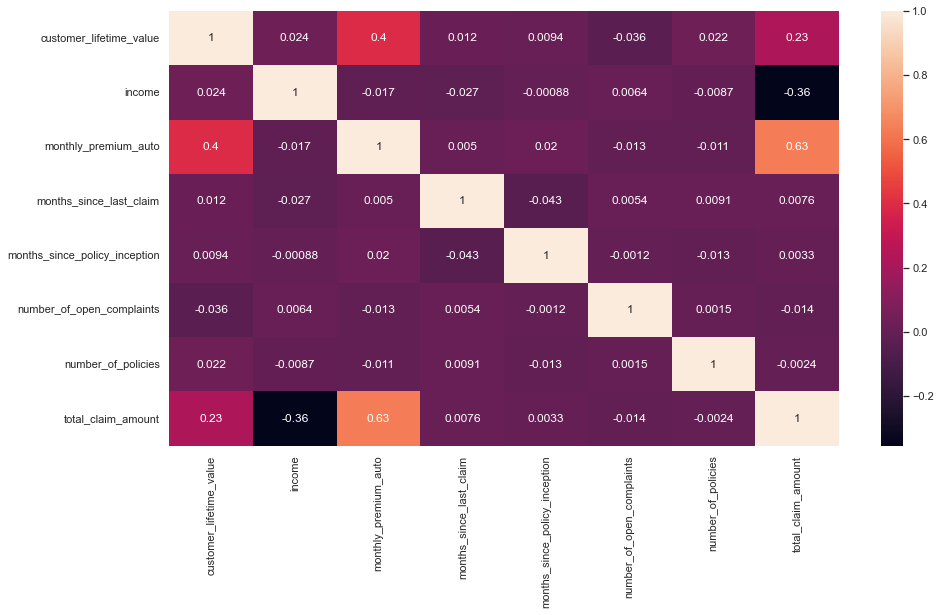

In [289]:
correlations_matrix = numerical_df.corr()
sns.heatmap(correlations_matrix, annot=True) 
plt.show()
# There is a low correlation within the variables, but monthly_premium_auto and total_claim_amount do have quite high correlation 

**8. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)**

In [290]:
def count_plot(x):
    for column in x.columns:
        plt.figure(figsize=(8,5))
        sns.countplot( x=x[column], data=x, palette='rainbow')
        plt.xticks(rotation = 45)
        plt.title(column+" divided by Class")

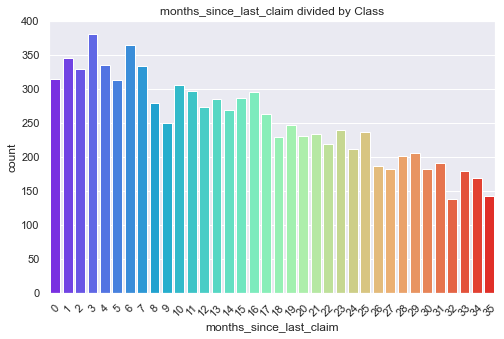

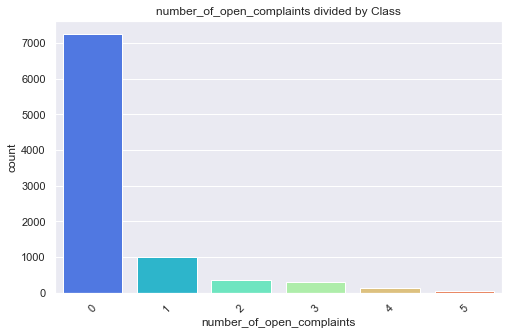

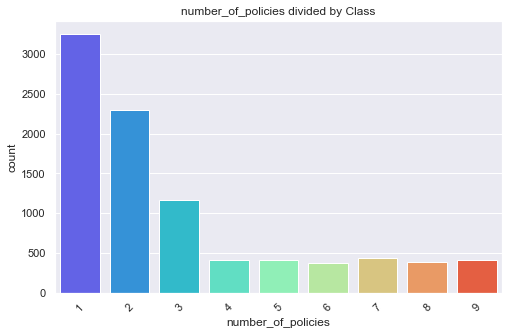

In [291]:
count_plot(discrete_df)

In [292]:
def distplot(x):
    for b in x.columns:
        plt.figure()
        plt.xticks()
        sns.distplot(x[b])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

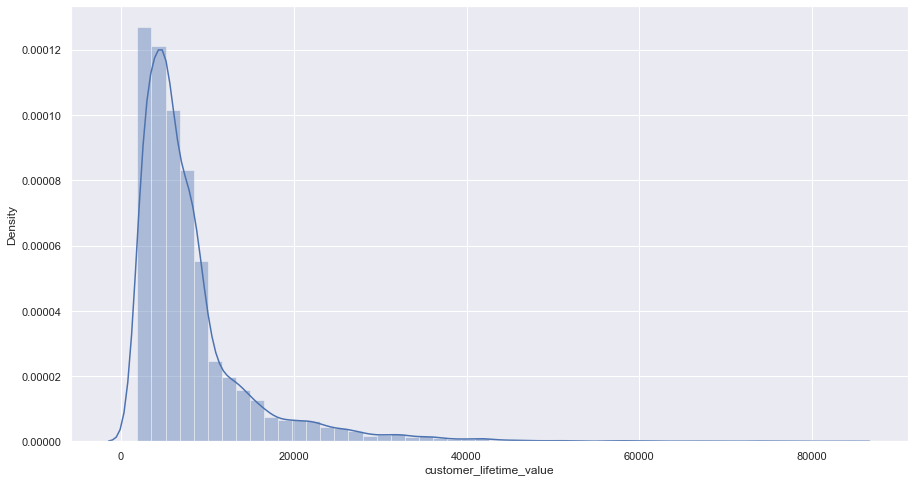

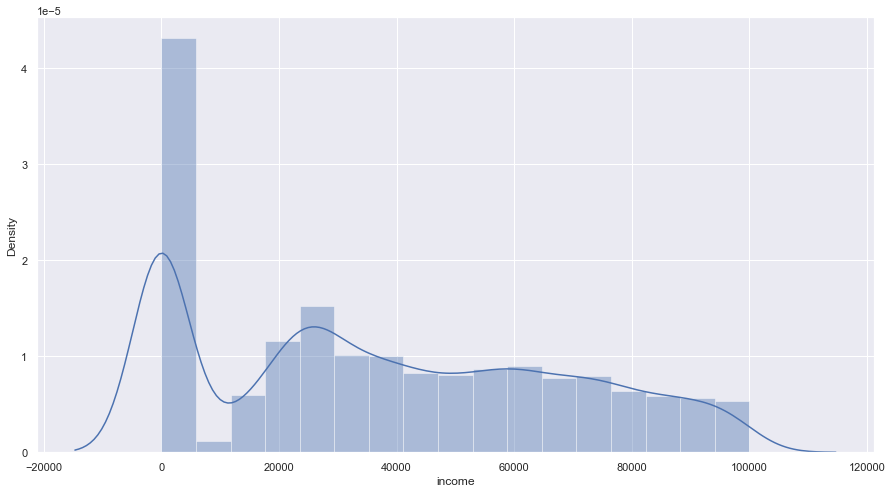

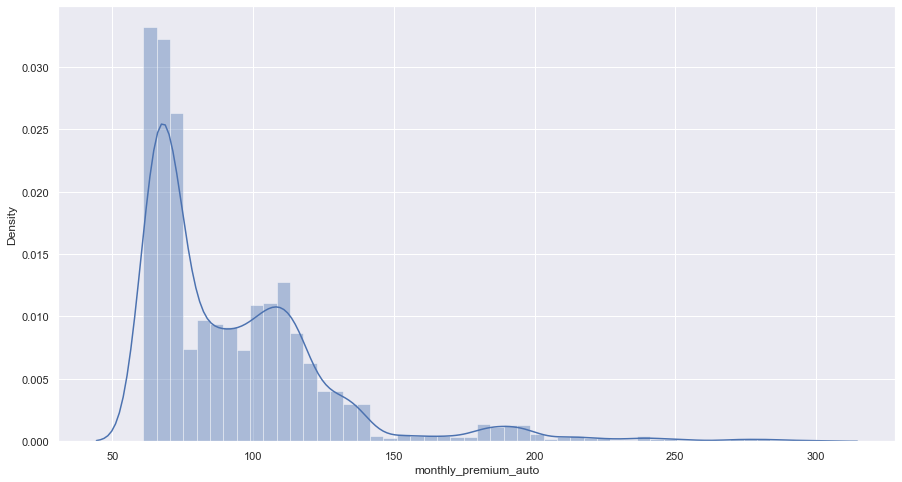

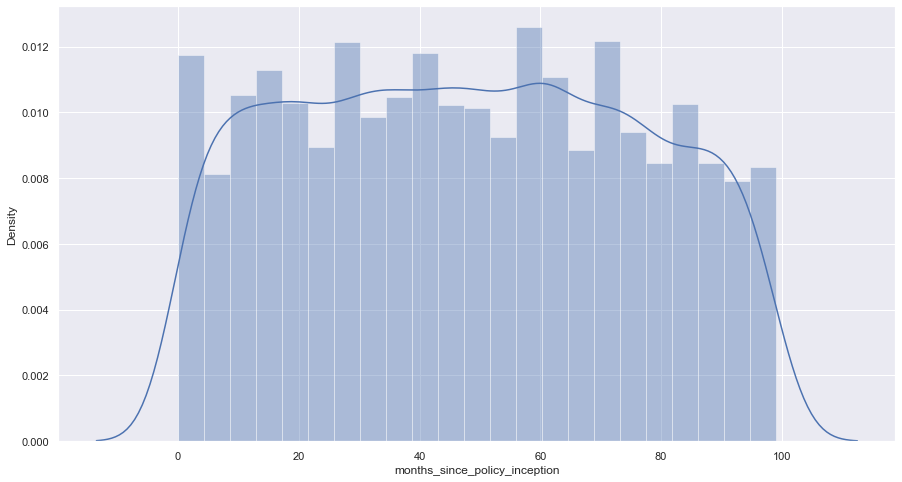

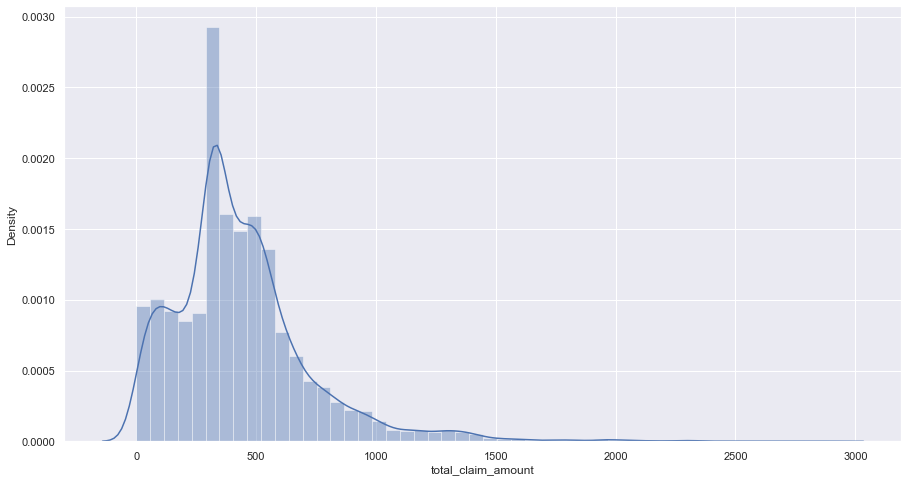

In [293]:
distplot(continuous_df)

**9. Comment what you can see in the plots.**

Discreate variables plot: We will later group cathegories to reduce the number of unique values per discreate variable

Continuous variables plot: They seem a bit skewed, we will later transform them so they look more like a normal distribution

**10. Look for outliers in the continuous variables.**

(HINT: There’s a good plot to do that!)

In [294]:
# build a function setting the definition of outlier to extract them 
def detect_outlier(column):
    # state q1 and q3 in 25% and 75%
    q1, q3 = np.percentile(sorted(column), [25,75])
    # from its definition
    iqr = q3 - q1
    # They seem a bit skewed, we will later transform them so they look more like a normal distribution
    lower_bounds = q1 - (3 * iqr)
    upper_bounds = q3 - (3 * iqr)
    
    outliers = [x for x in column if x <= lower_bounds or x >= upper_bounds]
    
    return outliers
#outliers_continuous_df = map(detect_outlier, continuous_df)
outliers_continuous_df= continuous_df.apply(detect_outlier)


In [295]:
outliers_continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


In [296]:
type(outliers_continuous_df)

pandas.core.frame.DataFrame

Now lets visualize it 

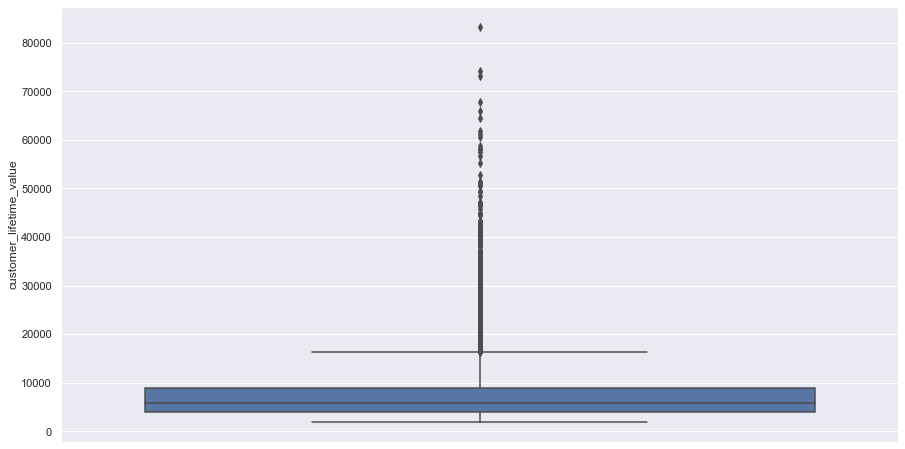

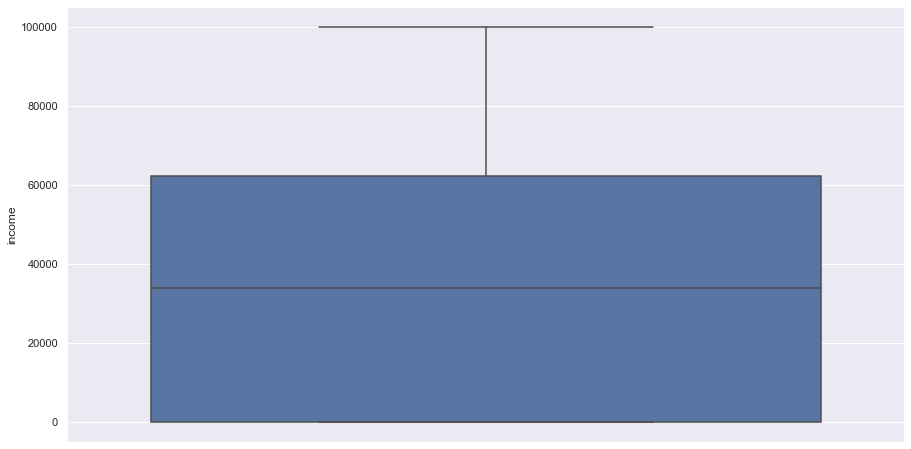

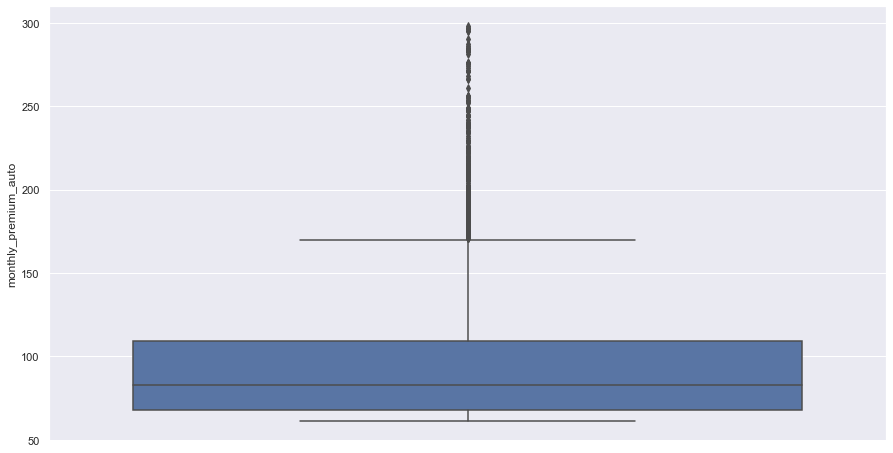

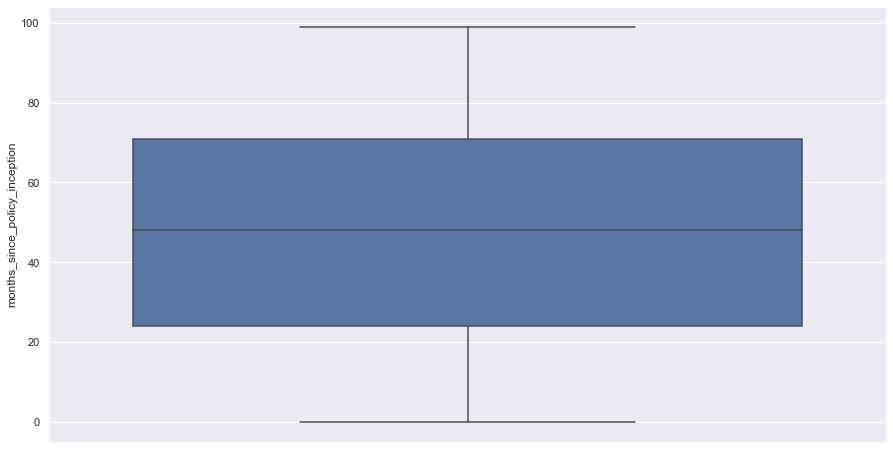

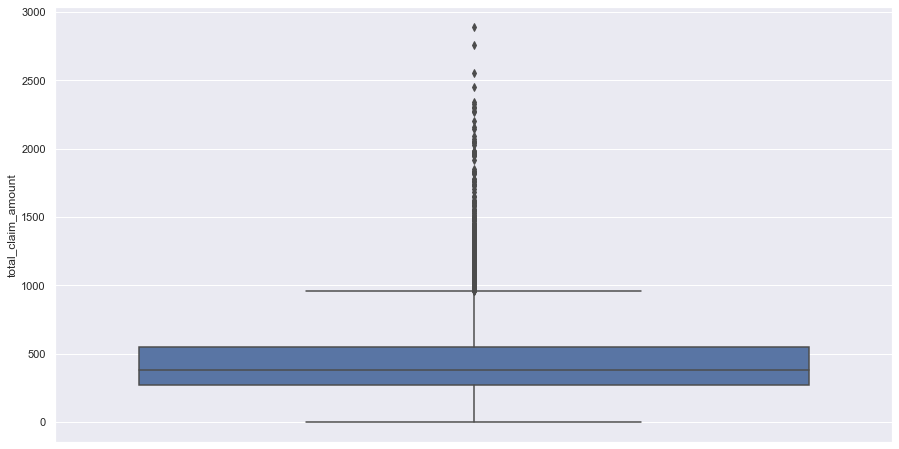

In [297]:
def box_plot(df):
    for column in df.columns:
        sns.boxplot(y=df[column])
        plt.show() 
box_plot(continuous_df)

**11. Did you find outliers? Comment what you will do with the**

In [298]:
# you can see some outliers in 'total_claim_amoun' and in 'customer_life_time_value' 

**12. Check all columns for NaN values. Decide what (if anything) you will need to do with them.**

In [299]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [300]:
#There is not NaN values

![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# 4.02 Lab | Cleaning categorical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in `files_for_lab` folder. In this lab we will explore categorical data.



### Instructions

**1. Import the necessary libraries if you are starting a new notebook.**
Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

In [301]:
#customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

**2. Find  all of the categorical data.  Save it in a categorical_df variable.**

In [302]:
categorical_df = customer_df.select_dtypes(object)

In [303]:
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


**3. Check for NaN values.**

In [304]:
categorical_df.isna().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

**4. Check all unique values of columns.**

In [305]:
for x in customer_df:
    print(x,len(pd.unique(customer_df[x].values)))

customer 9134
state 5
customer_lifetime_value 8041
response 2
coverage 3
education 5
effective_to_date 59
employmentstatus 5
gender 2
income 5694
location_code 3
marital_status 3
monthly_premium_auto 202
months_since_last_claim 36
months_since_policy_inception 100
number_of_open_complaints 6
number_of_policies 9
policy_type 3
policy 9
renew_offer_type 4
sales_channel 4
total_claim_amount 5106
vehicle_class 6
vehicle_size 3


**5. Check dtypes. Do they all make sense as categorical data?**

In [306]:
categorical_df.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [307]:
# Yes
# 'response' could be a Boolean

In [308]:
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


**6. Does any column contain alpha and numeric data?  Decide how to clean it.**

As far as I am concerned, alpha and numeric data refers to latin alphabet and arabic numbers. Ergo A-Z/a-z & 0-9. Therefore all the data in the DataFrame is alpha and numeric data

Making a broader interpretation, we can understand that the question refers to both kinds of data in the same cell. We can also interpretate a reference to the following characters #,@,&,%,?,!,-,:,€,$,',"

In [309]:
character=[]
for columns in categorical_df:
    if "#,@,&,%,?,!,-,:,€,$,'," in columns:
        character.append(columns)

In [310]:
character

[]

As we can see, there is no special characters in the DataFrame

Having said all the above, I understand it is asking for the second asumption: refers to both kinds of data in the same cell.
The column that presents the aforementioned characteristics is Customer.
To deal with them, I am going to drop Customer.

In [311]:
categorical_df = categorical_df.drop('customer', axis=1) # Drop Customer column

In [312]:
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


**7. Would you choose to do anything else to clean or wrangle the categorical data?  Comment your decisions.**

In [313]:
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


**8. Compare policy_type and policy.  What information is contained in these columns.  Can you identify what is important?** 

In [314]:
# They have basically the same information about the policys, so we should be able to drop one of them

In [315]:
categorical_df = categorical_df.drop('policy', axis=1) # Drop Policy

**9. Check number of unique values in each column, can they be combined in any way to ease encoding?  Comment your thoughts and make those changes.**

In [316]:
for x in categorical_df:
    print(x,len(pd.unique(categorical_df[x].values)))

state 5
response 2
coverage 3
education 5
employmentstatus 5
gender 2
location_code 3
marital_status 3
policy_type 3
renew_offer_type 4
sales_channel 4
vehicle_class 6
vehicle_size 3


![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# 4.03 Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

**1. Open the `categoricals` variable we created before.**

```python
categoricals = data.select_dtypes(np.object)
categoricals.head()
```

In [317]:
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize


**2. Plot all the categorical variables with the proper plot. What can you see?**

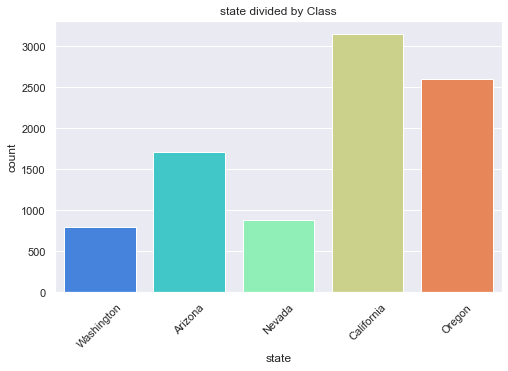

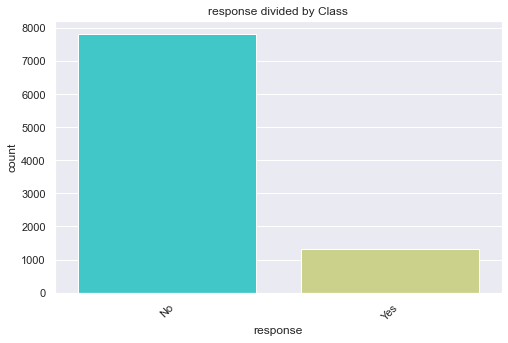

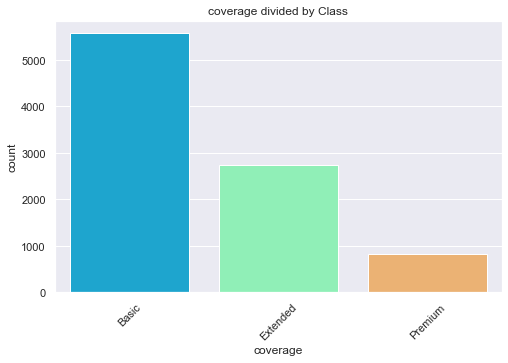

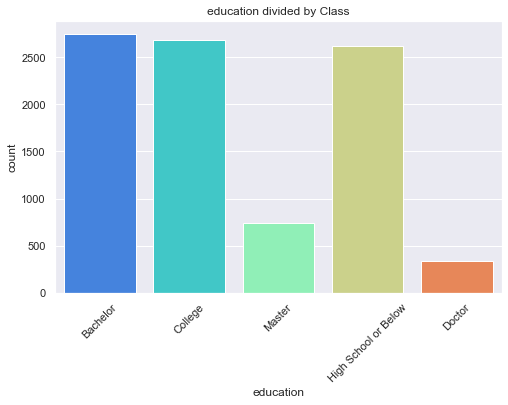

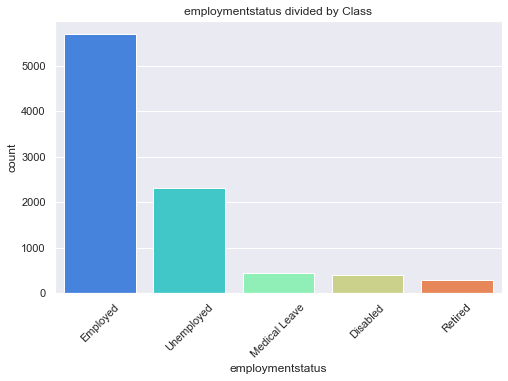

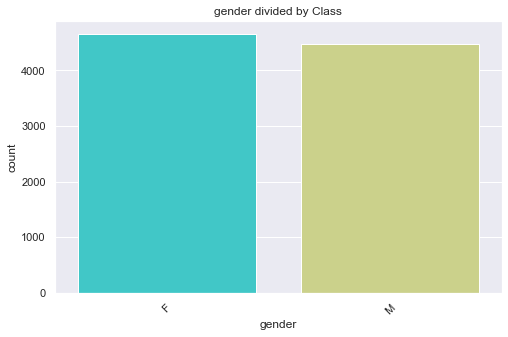

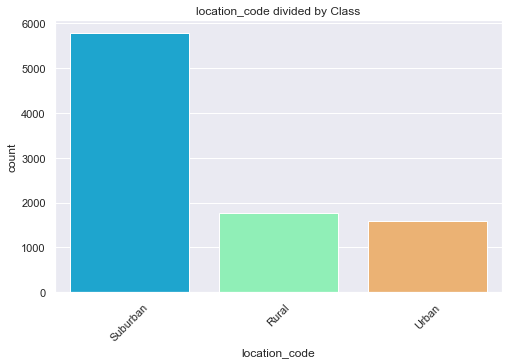

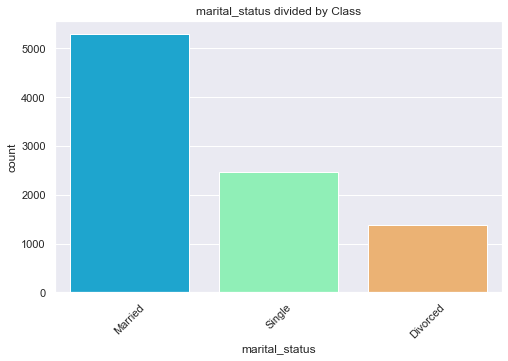

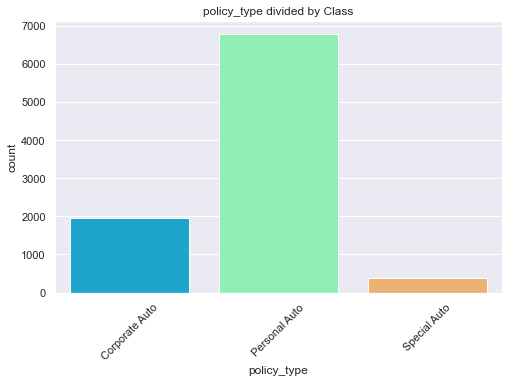

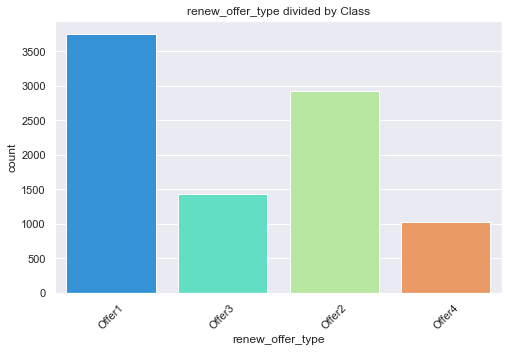

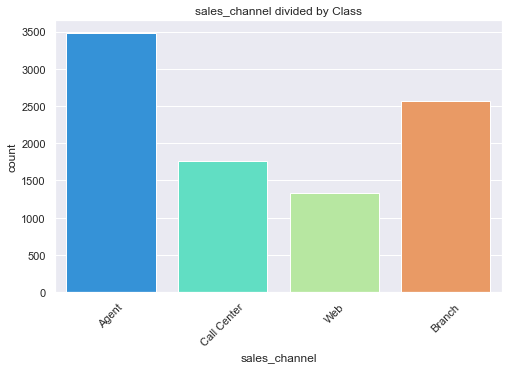

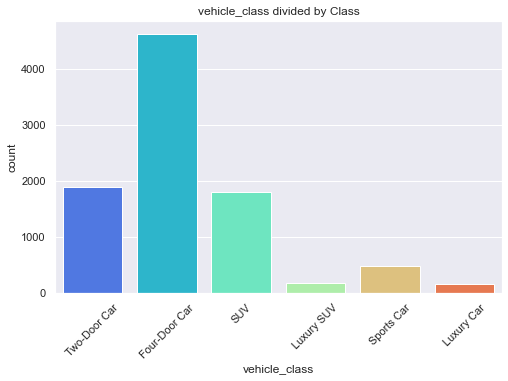

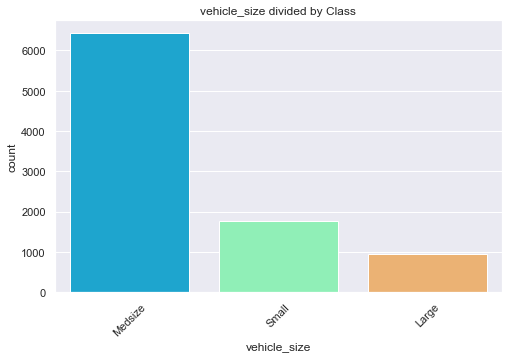

In [318]:
# Plot the all the categories per column as a countplot 

for column in categorical_df.columns:
    if column != 'Effective To Date': # Lets life the date for another more representative plot
        plt.figure(figsize=(8,5))
        sns.countplot( x=categorical_df[column], data=categorical_df, palette='rainbow')
        plt.xticks(rotation = 45)
        plt.title(column+" divided by Class")
    else:
        pass
    

<AxesSubplot:ylabel='response'>

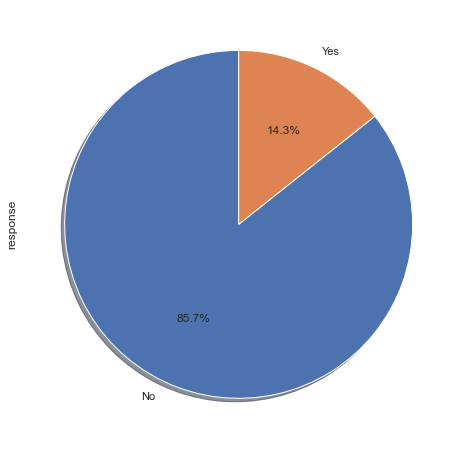

In [319]:
# We could also plot response in a pieplot
response= categorical_df.groupby("response")["response"].count()
response.plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)

**3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?**


In [320]:
categorical_df.head() # keep them

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize


**4. Plot time variable. Can you extract something from it?**

<AxesSubplot:xlabel='effective_to_date', ylabel='total_claim_amount'>

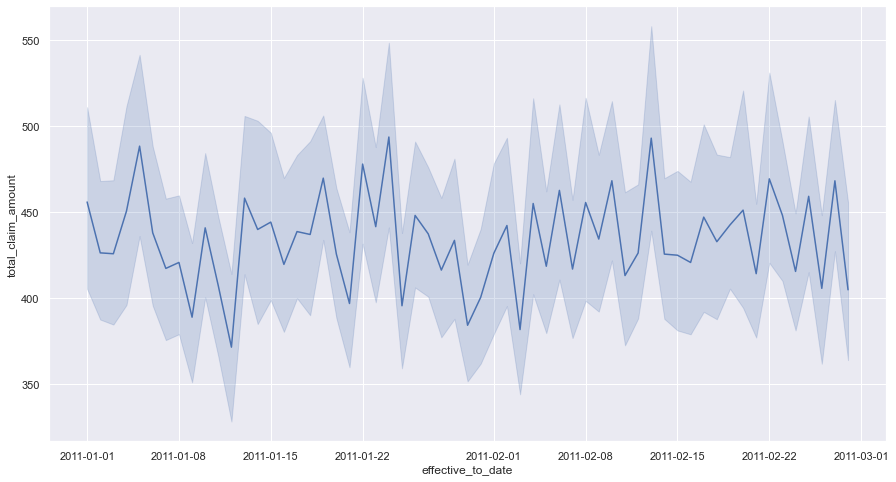

In [321]:
sns.set(rc={'figure.figsize':[15,8]})
sns.lineplot(x='effective_to_date', y='total_claim_amount',data=customer_df)
# it doesn't look like there is a clear patter from where we can extract information from

![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# 4.05 Lab | Comparing regression models


For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 


### Instructions


**1. In this final lab, we will model our data. Import sklearn `train_test_split` and separate the data.**

In [322]:
# Concat the numerical and categorical data frame we have been working with into new_customer_df to model it
new_customer_df = pd.concat([categorical_df, numerical_df], axis=1)  

In [323]:
new_customer_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize,2763.519279,56274,69,32,5,0,1,384.811147
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize,6979.535903,0,94,13,42,0,8,1131.464935
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize,12887.431650,48767,108,18,38,0,2,566.472247
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize,7645.861827,0,106,18,65,0,7,529.881344
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Offer2,Web,Four-Door Car,Medsize,23405.987980,71941,73,18,89,0,2,198.234764
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize,3096.511217,21604,79,14,28,0,1,379.200000
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize,8163.890428,0,85,9,37,3,2,790.784983
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Offer3,Branch,Four-Door Car,Large,7524.442436,21941,96,34,3,0,3,691.200000


**2. We will start with removing outliers, if you have not already done so.  We have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.**

**3. Create a copy of the dataframe for the data wrangling.**

In [324]:
# X-y split
y = new_customer_df['total_claim_amount']
X = new_customer_df.drop('total_claim_amount', axis=1)

In [325]:
y.shape

(9134,)

In [326]:
# Train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [327]:
X_test

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
8262,California,No,Basic,High School or Below,Employed,F,Suburban,Married,Personal Auto,Offer4,Agent,Sports Car,Medsize,9000.439546,28108,114,6,27,0,3
3400,California,No,Basic,Bachelor,Employed,M,Suburban,Married,Personal Auto,Offer2,Call Center,Four-Door Car,Small,2548.842787,47346,65,6,35,0,1
7077,California,No,Basic,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer2,Agent,SUV,Medsize,4171.300175,36723,106,13,18,1,1
2906,California,Yes,Basic,College,Medical Leave,F,Suburban,Married,Corporate Auto,Offer2,Call Center,Four-Door Car,Medsize,2722.210707,17576,71,29,70,0,1
4690,Arizona,No,Basic,College,Unemployed,M,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize,4734.257944,0,67,7,75,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4173,Washington,No,Basic,College,Employed,F,Rural,Divorced,Special Auto,Offer2,Agent,Four-Door Car,Medsize,4754.653816,30886,61,8,36,0,6
3341,Arizona,No,Extended,College,Employed,M,Rural,Married,Personal Auto,Offer3,Call Center,Four-Door Car,Medsize,7381.914168,54878,96,5,11,3,9
3652,Oregon,No,Basic,High School or Below,Employed,F,Urban,Married,Personal Auto,Offer2,Agent,Four-Door Car,Medsize,2895.213818,72014,72,24,58,0,1
8892,California,No,Extended,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer2,Web,Four-Door Car,Medsize,3450.073829,68082,88,24,53,0,1


In [328]:
#  Separate categorical and numerical features
X_train_num = X_train.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)

In [329]:
X_test_num = X_test.select_dtypes(np.number)
X_test_cat = X_test.select_dtypes(object)

**5. Encode the categorical variables (See the hint below for encoding categorical data!!!)**



##### Hint for Categorical Variables

You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):


##### Dummy code
data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

given that column "coverage" in the dataframe "data" has three categories:

"basic", "extended", and "premium" and values are to be represented in the same order.


column | decision
-------|---------
state| onehot encode
response| onehot encode
coverage | ordinal encode
education | combine master and dr.
employmentstatus | combine smallest 3 into 'other'
gender | onehot encode
location_code | ordinal encode 
marial_status | onehot encode
policy_type | onehot encode
policy | already dropped
renew_offer_type | onehot encode 
sales_channel | onehot encode
vehicle_class | onehot encode and combine luxury and sports
vehicle_size | ordinal encode

**A) PRE-PROCESSING CATEGORICAL VARIABLES** 

**a) Ordinal encode and Onehotencode split**

In [330]:
X_train_categorical_ORE = X_train_cat [['coverage' ,'education', 'employmentstatus', 'location_code' ,'vehicle_size']]
X_train_categorical_OHE = X_train_cat [['state', 'response', 'gender' ,'marital_status', 'policy_type', 'renew_offer_type', 'vehicle_class', 'sales_channel']]

In [331]:
X_test_categorical_ORE = X_test_cat [['coverage' ,'education', 'employmentstatus', 'location_code' ,'vehicle_size']]
X_test_categorical_OHE = X_test_cat [['state', 'response', 'gender' ,'marital_status', 'policy_type', 'renew_offer_type', 'vehicle_class', 'sales_channel']]

In [332]:
X_test_categorical_ORE.shape

(1827, 5)

**b) Ordinal encoding: converts each label into integer values and the encoded data represents the sequence of labels.**

Ordinal encode X_train

In [333]:
X_train_categorical_ORE['coverage'] = X_train_categorical_ORE['coverage'].map({"Basic": 0, "Extended": .5, "Premium": 1})
X_train_categorical_ORE['location_code'] = X_train_categorical_ORE['location_code'].map({"Rural": 0, "Suburban": .5, "Urban": 1})
X_train_categorical_ORE['vehicle_size'] = X_train_categorical_ORE['vehicle_size'].map({"Small": 0, "Medsize": .5, "Large": 1})
X_train_categorical_ORE["education"] = X_train_categorical_ORE["education"].map({"High School or Below" : 0, "College" : .25, "Bachelor" : .5, "Master" : .75, "Doctor" : 1})
X_train_categorical_ORE["employmentstatus"] = X_train_categorical_ORE["employmentstatus"].map({"Unemployed" : 0, "Medical Leave" : .25, "Disabled" : .5, "Retired" : .75, "Employed" : 1})

C:\Users\Jose María\AppData\Local\Temp\ipykernel_7720\1187769848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_categorical_ORE['coverage'] = X_train_categorical_ORE['coverage'].map({"Basic": 0, "Extended": .5, "Premium": 1})
C:\Users\Jose María\AppData\Local\Temp\ipykernel_7720\1187769848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_categorical_ORE['location_code'] = X_train_categorical_ORE['location_code'].map({"Rural": 0, "Suburban": .5, "Urban": 1})
C:\Users\Jose María\AppDat

Ordinal encode X_test

In [334]:
X_test_categorical_ORE['coverage'] = X_test_categorical_ORE['coverage'].map({"Basic": 0, "Extended": .5, "Premium": 1})
X_test_categorical_ORE['location_code'] = X_test_categorical_ORE['location_code'].map({"Rural": 0, "Suburban": .5, "Urban": 1})
X_test_categorical_ORE['vehicle_size'] = X_test_categorical_ORE['vehicle_size'].map({"Small": 0, "Medsize": .5, "Large": 1})
X_test_categorical_ORE["education"] = X_test_categorical_ORE["education"].map({"High School or Below" : 0, "College" : .25, "Bachelor" : .5, "Master" : .75, "Doctor" : 1})
X_test_categorical_ORE["employmentstatus"] = X_test_categorical_ORE["employmentstatus"].map({"Unemployed" : 0, "Medical Leave" : .25, "Disabled" : .5, "Retired" : .75, "Employed" : 1})

C:\Users\Jose María\AppData\Local\Temp\ipykernel_7720\2067091416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_categorical_ORE['coverage'] = X_test_categorical_ORE['coverage'].map({"Basic": 0, "Extended": .5, "Premium": 1})
C:\Users\Jose María\AppData\Local\Temp\ipykernel_7720\2067091416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_categorical_ORE['location_code'] = X_test_categorical_ORE['location_code'].map({"Rural": 0, "Suburban": .5, "Urban": 1})
C:\Users\Jose María\AppData\Lo

In [335]:
X_train_categorical_ORE.shape

(7307, 5)

In [336]:
X_test_categorical_ORE.shape

(1827, 5)

Regroup

In [337]:
'''X_train_categorical_OHE.loc[X_train_categorical_OHE['vehicle_class'].isin(['Luxury SUV ', 'Luxury Car ','Sports Car'])]="Luxury Car"
X_train_categorical_OHE['vehicle_class'].value_counts(dropna=False)'''

'X_train_categorical_OHE.loc[X_train_categorical_OHE[\'vehicle_class\'].isin([\'Luxury SUV \', \'Luxury Car \',\'Sports Car\'])]="Luxury Car"\nX_train_categorical_OHE[\'vehicle_class\'].value_counts(dropna=False)'

**c) One hot encoding: is a representation of categorical variable as binary vectors.**

Train encoder on train set

In [338]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_train_categorical_OHE) 
columnsOHEtrain = encoder.get_feature_names(input_features = X_train_categorical_OHE.columns)
columnsOHEtest = encoder.get_feature_names(input_features = X_test_categorical_OHE.columns)

C:\Users\Jose María\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Onehotencode train set

In [339]:
X_train_categorical_OHE = pd.DataFrame(encoder.transform(X_train_categorical_OHE).toarray(),columns=columnsOHEtrain)

Onehotencode test set

In [340]:
X_test_categorical_OHE = pd.DataFrame(encoder.transform(X_test_categorical_OHE).toarray(),columns=columnsOHEtest)

In [341]:
X_train_categorical_OHE.shape

(7307, 21)

In [342]:
X_test_categorical_OHE.shape

(1827, 21)

**d) Concatenate Ordinal encode and Onehot encode categoricals** 

In [343]:
# reset index and drop old index
X_train_categorical_ORE = X_train_categorical_ORE.reset_index(drop=True)
X_train_categorical_OHE = X_train_categorical_OHE.reset_index(drop=True)
# concatenate into a encoded train set
X_train_cat_processed = pd.concat([X_train_categorical_ORE, X_train_categorical_OHE], axis=1) 

In [344]:
# reset index and drop old index
X_test_categorical_ORE = X_test_categorical_ORE.reset_index(drop=True)
X_test_categorical_OHE = X_test_categorical_OHE.reset_index(drop=True)
# concatenate into a encoded test set
X_test_cat_processed = pd.concat([X_test_categorical_ORE, X_test_categorical_OHE], axis=1) 

In [345]:
X_train_cat_processed.shape

(7307, 26)

In [346]:
X_test_cat_processed.shape

(1827, 26)

**4. Normalize the continuous variables. You can use any one method you want.**

**B) PRE-PROCESSING NUMERICAL VARIABLES** 

**a) Continous and discrete split**

In [347]:
# Lets introduce discrete and continous variables in different lists based on the above criteria
def continuous_discrete (x):
    discrete = []
    continuous = []
    for column in numerical_df.columns:
        if len(numerical_df[column].unique()) < (numerical_df.shape[0] * 0.01):
            discrete.append(column)
        else:
            continuous.append(column)
    return discrete, continuous

In [348]:
# applying the function
X_train_num_continuous, X_train_num_discrete = continuous_discrete(X_train_num)
X_test_num_continuous, X_test_num_discrete = continuous_discrete(X_test_num)

In [349]:
display(X_train_num_continuous)
display(X_train_num_discrete)
display(X_test_num_continuous)
display(X_test_num_discrete)

['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_policy_inception',
 'total_claim_amount']

['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_policy_inception',
 'total_claim_amount']

In [350]:
X_train_num_continuous = X_train_num [['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_policy_inception']] 
X_train_num_discrete = X_train_num [['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']]

In [351]:
X_test_num_continuous = X_test_num [['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_policy_inception']] 
X_test_num_discrete = X_test_num [['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']]

**b) Ordinal encode discrete variables** 

**Binning**

Copy X_train_num_discrete and X_test_num_discrete_encoded

In [352]:
X_train_num_discrete_encoded = X_train_num_discrete.copy()
X_test_num_discrete_encoded = X_test_num_discrete.copy()

Display unique values

In [353]:
X_train_num_discrete['months_since_last_claim'].unique()

array([11, 33,  7, 15,  4, 24, 19,  3, 28, 13, 12,  9,  8, 35, 31, 14, 10,
       20, 30, 25,  1, 18, 34, 16,  6, 17, 27,  2, 26, 22, 21, 23, 32,  0,
        5, 29], dtype=int64)

Bin train set

In [354]:
# Bins of the same width
X_train_num_discrete_labels1 = ['short_term', 'middle_term', 'long_term']
X_train_num_discrete_encoded['months_since_last_claim.ore'] = pd.cut(X_train_num_discrete['months_since_last_claim'],3,labels=X_train_num_discrete_labels1)

Bin test set

In [355]:
# Bins of the same width
X_test_num_discrete_labels1 = ['short_term', 'middle_term', 'long_term']
X_test_num_discrete_encoded['months_since_last_claim.ore'] = pd.cut(X_test_num_discrete['months_since_last_claim'],3,labels=X_test_num_discrete_labels1)

In [356]:
X_train_num_discrete_encoded

,months_since_last_claim,number_of_open_complaints,number_of_policies,months_since_last_claim.ore
5175,11,0,2,short_term
725,33,0,1,long_term
352,7,0,1,short_term
4455,15,0,2,middle_term
7362,11,0,2,short_term
...,...,...,...,...
5593,6,0,2,short_term
3239,7,1,1,short_term
860,5,0,2,short_term
8381,17,1,9,middle_term


In [357]:
X_test_num_discrete_encoded

,months_since_last_claim,number_of_open_complaints,number_of_policies,months_since_last_claim.ore
8262,6,0,3,short_term
3400,6,0,1,short_term
7077,13,1,1,middle_term
2906,29,0,1,long_term
4690,7,0,5,short_term
...,...,...,...,...
4173,8,0,6,short_term
3341,5,3,9,short_term
3652,24,0,1,long_term
8892,24,0,1,long_term


drop columns

In [358]:
X_train_num_discrete_encoded = X_train_num_discrete_encoded.drop('months_since_last_claim', axis=1)
X_test_num_discrete_encoded = X_test_num_discrete_encoded.drop('months_since_last_claim', axis=1)

Display unique values

In [359]:
X_train_num_discrete['number_of_open_complaints'].unique

<bound method Series.unique of 5175    0
725     0
352     0
4455    0
7362    0
       ..
5593    0
3239    1
860     0
8381    1
3223    0
Name: number_of_open_complaints, Length: 7307, dtype: int64>

Bin train set

In [360]:
# Bins of the same width
X_train_num_discrete_labels2 = ['low_number', 'high_number', 'really_high_number']
X_train_num_discrete_encoded['number_of_open_complaints.ore'] = pd.cut(X_train_num_discrete['number_of_open_complaints'],3,labels=X_train_num_discrete_labels2)

Bin test set

In [361]:
X_test_num_discrete_labels2 = ['low_number', 'high_number', 'really_high_number']
X_test_num_discrete_encoded['number_of_open_complaints.ore'] = pd.cut(X_test_num_discrete['number_of_open_complaints'],3,labels=X_train_num_discrete_labels2)

Drop columns

In [362]:
# drop column
X_train_num_discrete_encoded = X_train_num_discrete_encoded.drop('number_of_open_complaints', axis=1)
X_test_num_discrete_encoded = X_test_num_discrete_encoded.drop('number_of_open_complaints', axis=1)

Display unique values

In [363]:
X_train_num_discrete['number_of_policies'].unique()

array([2, 1, 3, 7, 5, 9, 6, 8, 4], dtype=int64)

Bin train set

In [364]:
# Bins of the same width
X_train_num_discrete_labels3 = ['low', 'medium', 'high']
X_train_num_discrete_encoded['number_of_policies.ore'] = pd.cut(X_train_num_discrete['number_of_policies'],3,labels=X_train_num_discrete_labels3)

Bin test set

In [365]:
X_test_num_discrete_labels3 = ['low', 'medium', 'high']
X_test_num_discrete_encoded['number_of_policies.ore'] = pd.cut(X_test_num_discrete['number_of_policies'],3,labels=X_test_num_discrete_labels3)

Drop columns

In [366]:
# drop column
X_train_num_discrete_encoded = X_train_num_discrete_encoded.drop('number_of_policies', axis=1)
X_test_num_discrete_encoded = X_test_num_discrete_encoded.drop('number_of_policies', axis=1)

In [367]:
X_train_num_discrete_encoded

,months_since_last_claim.ore,number_of_open_complaints.ore,number_of_policies.ore
5175,short_term,low_number,low
725,long_term,low_number,low
352,short_term,low_number,low
4455,middle_term,low_number,low
7362,short_term,low_number,low
...,...,...,...
5593,short_term,low_number,low
3239,short_term,low_number,low
860,short_term,low_number,low
8381,middle_term,low_number,high


In [368]:
X_test_num_discrete_encoded

,months_since_last_claim.ore,number_of_open_complaints.ore,number_of_policies.ore
8262,short_term,low_number,low
3400,short_term,low_number,low
7077,middle_term,low_number,low
2906,long_term,low_number,low
4690,short_term,low_number,medium
...,...,...,...
4173,short_term,low_number,medium
3341,short_term,high_number,high
3652,long_term,low_number,low
8892,long_term,low_number,low


**Ordinal encode the bins**

In [369]:
X_train_num_discrete_encoded['months_since_last_claim.ore'] = X_train_num_discrete_encoded['months_since_last_claim.ore'].map({"short_term": 0, "middle_term": .5, "long_term": 1})
X_train_num_discrete_encoded['number_of_open_complaints.ore'] = X_train_num_discrete_encoded['number_of_open_complaints.ore'].map({"low_number": 0, "high_number": .5, "really_high_number": 1})
X_train_num_discrete_encoded['number_of_policies.ore'] = X_train_num_discrete_encoded['number_of_policies.ore'].map({"low": 0, "medium": .5, "high": 1})

In [370]:
X_test_num_discrete_encoded['months_since_last_claim.ore'] = X_test_num_discrete_encoded['months_since_last_claim.ore'].map({"short_term": 0, "middle_term": .5, "long_term": 1})
X_test_num_discrete_encoded['number_of_open_complaints.ore'] = X_test_num_discrete_encoded['number_of_open_complaints.ore'].map({"low_number": 0, "high_number": .5, "really_high_number": 1})
X_test_num_discrete_encoded['number_of_policies.ore'] = X_test_num_discrete_encoded['number_of_policies.ore'].map({"low": 0, "medium": .5, "high": 1})

In [371]:
X_train_num_discrete_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7307 entries, 5175 to 3223
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   months_since_last_claim.ore    7307 non-null   category
 1   number_of_open_complaints.ore  7307 non-null   category
 2   number_of_policies.ore         7307 non-null   category
dtypes: category(3)
memory usage: 78.9 KB


In [372]:
X_test_num_discrete_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 8262 to 7422
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   months_since_last_claim.ore    1827 non-null   category
 1   number_of_open_complaints.ore  1827 non-null   category
 2   number_of_policies.ore         1827 non-null   category
dtypes: category(3)
memory usage: 20.0 KB


Change numeric type

In [373]:
X_train_num_discrete_encoded['months_since_last_claim.ore'] = pd.to_numeric(X_train_num_discrete_encoded['months_since_last_claim.ore'])
X_train_num_discrete_encoded['number_of_open_complaints.ore'] = pd.to_numeric(X_train_num_discrete_encoded['number_of_open_complaints.ore'])
X_train_num_discrete_encoded['number_of_policies.ore'] = pd.to_numeric(X_train_num_discrete_encoded['number_of_policies.ore'])

In [374]:
X_test_num_discrete_encoded['months_since_last_claim.ore'] = pd.to_numeric(X_test_num_discrete_encoded['months_since_last_claim.ore'])
X_test_num_discrete_encoded['number_of_open_complaints.ore'] = pd.to_numeric(X_test_num_discrete_encoded['number_of_open_complaints.ore'])
X_test_num_discrete_encoded['number_of_policies.ore'] = pd.to_numeric(X_test_num_discrete_encoded['number_of_policies.ore'])

In [375]:
X_train_num_discrete_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7307 entries, 5175 to 3223
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   months_since_last_claim.ore    7307 non-null   float64
 1   number_of_open_complaints.ore  7307 non-null   float64
 2   number_of_policies.ore         7307 non-null   float64
dtypes: float64(3)
memory usage: 228.3 KB


In [376]:
X_test_num_discrete_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 8262 to 7422
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   months_since_last_claim.ore    1827 non-null   float64
 1   number_of_open_complaints.ore  1827 non-null   float64
 2   number_of_policies.ore         1827 non-null   float64
dtypes: float64(3)
memory usage: 57.1 KB


**c) Scaling continuous variables: Transform your data so that it fits within a specific scale**

In [377]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [378]:
scaler = MinMaxScaler()
# train transformer
scaler.fit(X_train_num_continuous)
# scale train set
X_train_num_continuous_columns = X_train_num_continuous.columns
X_train_num_continuous_scaled = pd.DataFrame(scaler.transform(X_train_num_continuous), columns= X_train_num_continuous_columns) #same thing in 1 line: X_train_scaled = scaler.fit_transform(X_train)
# scale test set
X_test_num_continuous_columns = X_test_num_continuous.columns
X_test_num_continuous_scaled = pd.DataFrame(scaler.transform(X_test_num_continuous), columns = X_test_num_continuous_columns)

In [379]:
X_test_num_continuous_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        1827 non-null   float64
 1   income                         1827 non-null   float64
 2   monthly_premium_auto           1827 non-null   float64
 3   months_since_policy_inception  1827 non-null   float64
dtypes: float64(4)
memory usage: 57.2 KB


**d) Concatenate continuous & discrete**

Concatenate X_train continuous & discrete

In [380]:
# reset index and drop old index
X_train_num_continuous_scaled = X_train_num_continuous_scaled.reset_index(drop=True)
X_train_num_discrete_encoded = X_train_num_discrete_encoded.reset_index(drop=True)
# concatenate into a encoded test set
X_train_num_processed = pd.concat([X_train_num_continuous_scaled, X_train_num_discrete_encoded], axis=1) 

Concatenate X_test continuous & discrete

In [381]:
# reset index and drop old index
X_test_num_continuous_scaled = X_test_num_continuous_scaled.reset_index(drop=True)
X_test_num_discrete_encoded = X_test_num_discrete_encoded.reset_index(drop=True)
# concatenate into a encoded test set
X_test_num_processed = pd.concat([X_test_num_continuous_scaled, X_test_num_discrete_encoded], axis=1) 

In [382]:
X_train_num_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7307 entries, 0 to 7306
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        7307 non-null   float64
 1   income                         7307 non-null   float64
 2   monthly_premium_auto           7307 non-null   float64
 3   months_since_policy_inception  7307 non-null   float64
 4   months_since_last_claim.ore    7307 non-null   float64
 5   number_of_open_complaints.ore  7307 non-null   float64
 6   number_of_policies.ore         7307 non-null   float64
dtypes: float64(7)
memory usage: 399.7 KB


In [383]:
X_test_num_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        1827 non-null   float64
 1   income                         1827 non-null   float64
 2   monthly_premium_auto           1827 non-null   float64
 3   months_since_policy_inception  1827 non-null   float64
 4   months_since_last_claim.ore    1827 non-null   float64
 5   number_of_open_complaints.ore  1827 non-null   float64
 6   number_of_policies.ore         1827 non-null   float64
dtypes: float64(7)
memory usage: 100.0 KB


**C) CONCATENATE PROCESSED CATEGORICAL AND NUMERICAL DATA**

In [384]:
# reset index and drop old index
X_train_cat_processed = X_train_cat_processed.reset_index(drop=True)
X_train_num_processed = X_train_num_processed.reset_index(drop=True)
# concatenate
X_train_processed = pd.concat([X_train_num_processed, X_train_cat_processed], axis=1)
# reset index and drop old index
X_test_cat_processed = X_test_cat_processed.reset_index(drop=True)
X_test_num_processed = X_test_num_processed.reset_index(drop=True)
# concatenate
X_test_processed = pd.concat([X_test_num_processed, X_test_cat_processed], axis=1)

In [385]:
X_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7307 entries, 0 to 7306
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        7307 non-null   float64
 1   income                         7307 non-null   float64
 2   monthly_premium_auto           7307 non-null   float64
 3   months_since_policy_inception  7307 non-null   float64
 4   months_since_last_claim.ore    7307 non-null   float64
 5   number_of_open_complaints.ore  7307 non-null   float64
 6   number_of_policies.ore         7307 non-null   float64
 7   coverage                       7307 non-null   float64
 8   education                      7307 non-null   float64
 9   employmentstatus               7307 non-null   float64
 10  location_code                  7307 non-null   float64
 11  vehicle_size                   7307 non-null   float64
 12  state_California               7307 non-null   f

In [386]:
X_test_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        1827 non-null   float64
 1   income                         1827 non-null   float64
 2   monthly_premium_auto           1827 non-null   float64
 3   months_since_policy_inception  1827 non-null   float64
 4   months_since_last_claim.ore    1827 non-null   float64
 5   number_of_open_complaints.ore  1827 non-null   float64
 6   number_of_policies.ore         1827 non-null   float64
 7   coverage                       1827 non-null   float64
 8   education                      1827 non-null   float64
 9   employmentstatus               1827 non-null   float64
 10  location_code                  1827 non-null   float64
 11  vehicle_size                   1827 non-null   float64
 12  state_California               1827 non-null   f

In [387]:
# X-y split
display('y: ', y)
display('X: ', X)
# Train-test split
display('X_train: ', X_train)
display('X_test: ', X_test)
display('y_train: ', y_train)
display('y_test: ', y_test)
# Numercial-categorical split
display('X_train_num: ', X_train_num)
display('X_train_cat: ', X_train_cat)
display('X_test_num: ', X_test_num)
display('X_test_cat: ', X_test_cat)
# PRE-PROCESSING CATEGORICAL VARIABLES
### Ordinal encode and Onehotencode split
display('X_train_categorical_ORE: ', X_train_categorical_ORE)
display('X_train_categorical_OHE: ', X_train_categorical_OHE)
display('X_test_categorical_ORE: ', X_test_categorical_ORE)
display('X_test_categorical_OHE: ', X_test_categorical_OHE)
### Concatenate Ordinal encode and Onehotencode categoricals
display('X_train_cat_processed: ', X_train_cat_processed)
display('X_test_cat_processed: ', X_test_cat_processed)
# PRE-PROCESSING NUMERICAL VARIABLES
### Continous and discrete split
display('X_train_num_continuous: ', X_train_num_continuous)
display('X_train_num_discrete: ', X_train_num_discrete)
display('X_test_num_continuous: ', X_test_num_continuous)
display('X_test_num_discrete: ', X_test_num_discrete) 
### Ordinal encode discrete variables
display('X_train_num_discrete_encoded: ', X_train_num_discrete_encoded)
display('X_test_num_discrete_encoded: ', X_test_num_discrete_encoded)
### Scaling continuous variables
display('X_train_num_continuous_scaled: ', X_train_num_continuous_scaled)
display('X_test_num_continuous_scaled: ', X_test_num_continuous_scaled)
### Concatenate continuous & discrete
display('X_train_num_processed: ', X_train_num_processed)
display('X_test_num_processed: ', X_test_num_processed)
# CONCATENATE PROCESSED CATEGORICAL AND NUMERICAL DATA
display('X_train_processed: ', X_train_processed)
display('X_test_processed: ', X_test_processed)

'y: '

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: total_claim_amount, Length: 9134, dtype: float64

'X: '

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize,2763.519279,56274,69,32,5,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize,6979.535903,0,94,13,42,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize,12887.431650,48767,108,18,38,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize,7645.861827,0,106,18,65,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Offer2,Web,Four-Door Car,Medsize,23405.987980,71941,73,18,89,0,2
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize,3096.511217,21604,79,14,28,0,1
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize,8163.890428,0,85,9,37,3,2
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Offer3,Branch,Four-Door Car,Large,7524.442436,21941,96,34,3,0,3


'X_train: '

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
5175,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Offer2,Agent,Four-Door Car,Medsize,19338.529300,22784,70,11,68,0,2
725,Arizona,No,Basic,Bachelor,Medical Leave,M,Suburban,Married,Personal Auto,Offer2,Agent,Four-Door Car,Medsize,2308.648034,20811,61,33,61,0,1
352,California,No,Basic,High School or Below,Unemployed,F,Suburban,Single,Corporate Auto,Offer1,Call Center,Four-Door Car,Small,2558.178159,0,72,7,77,0,1
4455,Washington,No,Basic,High School or Below,Unemployed,F,Suburban,Single,Personal Auto,Offer2,Branch,SUV,Medsize,12234.362320,0,117,15,68,0,2
7362,Oregon,No,Basic,High School or Below,Medical Leave,F,Suburban,Married,Personal Auto,Offer2,Web,Four-Door Car,Small,7451.479991,26239,65,11,39,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5593,California,No,Premium,College,Disabled,M,Suburban,Divorced,Corporate Auto,Offer1,Call Center,Sports Car,Small,29049.713150,21070,195,6,47,0,2
3239,Oregon,No,Extended,Bachelor,Employed,F,Rural,Married,Personal Auto,Offer2,Web,Sports Car,Medsize,4971.353586,98784,124,7,36,1,1
860,Arizona,Yes,Extended,Bachelor,Unemployed,F,Suburban,Divorced,Personal Auto,Offer1,Call Center,SUV,Medsize,14635.451580,0,139,5,56,0,2
8381,Oregon,Yes,Basic,High School or Below,Retired,M,Suburban,Married,Personal Auto,Offer1,Web,Sports Car,Medsize,8382.630118,19683,117,17,41,1,9


'X_test: '

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
8262,California,No,Basic,High School or Below,Employed,F,Suburban,Married,Personal Auto,Offer4,Agent,Sports Car,Medsize,9000.439546,28108,114,6,27,0,3
3400,California,No,Basic,Bachelor,Employed,M,Suburban,Married,Personal Auto,Offer2,Call Center,Four-Door Car,Small,2548.842787,47346,65,6,35,0,1
7077,California,No,Basic,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer2,Agent,SUV,Medsize,4171.300175,36723,106,13,18,1,1
2906,California,Yes,Basic,College,Medical Leave,F,Suburban,Married,Corporate Auto,Offer2,Call Center,Four-Door Car,Medsize,2722.210707,17576,71,29,70,0,1
4690,Arizona,No,Basic,College,Unemployed,M,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize,4734.257944,0,67,7,75,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4173,Washington,No,Basic,College,Employed,F,Rural,Divorced,Special Auto,Offer2,Agent,Four-Door Car,Medsize,4754.653816,30886,61,8,36,0,6
3341,Arizona,No,Extended,College,Employed,M,Rural,Married,Personal Auto,Offer3,Call Center,Four-Door Car,Medsize,7381.914168,54878,96,5,11,3,9
3652,Oregon,No,Basic,High School or Below,Employed,F,Urban,Married,Personal Auto,Offer2,Agent,Four-Door Car,Medsize,2895.213818,72014,72,24,58,0,1
8892,California,No,Extended,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer2,Web,Four-Door Car,Medsize,3450.073829,68082,88,24,53,0,1


'y_train: '

5175     224.904234
725      292.800000
352      345.600000
4455     930.594707
7362     312.000000
           ...     
5593    1404.000000
3239     155.412984
860      667.200000
8381     561.600000
3223     417.600000
Name: total_claim_amount, Length: 7307, dtype: float64

'y_test: '

8262    547.200000
3400    312.000000
7077    580.091966
2906    398.502948
4690    747.458052
           ...    
4173      8.315904
3341    204.953947
3652    188.204234
8892     39.579516
7422    272.844816
Name: total_claim_amount, Length: 1827, dtype: float64

'X_train_num: '

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
5175,19338.529300,22784,70,11,68,0,2
725,2308.648034,20811,61,33,61,0,1
352,2558.178159,0,72,7,77,0,1
4455,12234.362320,0,117,15,68,0,2
7362,7451.479991,26239,65,11,39,0,2
...,...,...,...,...,...,...,...
5593,29049.713150,21070,195,6,47,0,2
3239,4971.353586,98784,124,7,36,1,1
860,14635.451580,0,139,5,56,0,2
8381,8382.630118,19683,117,17,41,1,9


'X_train_cat: '

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
5175,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Offer2,Agent,Four-Door Car,Medsize
725,Arizona,No,Basic,Bachelor,Medical Leave,M,Suburban,Married,Personal Auto,Offer2,Agent,Four-Door Car,Medsize
352,California,No,Basic,High School or Below,Unemployed,F,Suburban,Single,Corporate Auto,Offer1,Call Center,Four-Door Car,Small
4455,Washington,No,Basic,High School or Below,Unemployed,F,Suburban,Single,Personal Auto,Offer2,Branch,SUV,Medsize
7362,Oregon,No,Basic,High School or Below,Medical Leave,F,Suburban,Married,Personal Auto,Offer2,Web,Four-Door Car,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5593,California,No,Premium,College,Disabled,M,Suburban,Divorced,Corporate Auto,Offer1,Call Center,Sports Car,Small
3239,Oregon,No,Extended,Bachelor,Employed,F,Rural,Married,Personal Auto,Offer2,Web,Sports Car,Medsize
860,Arizona,Yes,Extended,Bachelor,Unemployed,F,Suburban,Divorced,Personal Auto,Offer1,Call Center,SUV,Medsize
8381,Oregon,Yes,Basic,High School or Below,Retired,M,Suburban,Married,Personal Auto,Offer1,Web,Sports Car,Medsize


'X_test_num: '

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
8262,9000.439546,28108,114,6,27,0,3
3400,2548.842787,47346,65,6,35,0,1
7077,4171.300175,36723,106,13,18,1,1
2906,2722.210707,17576,71,29,70,0,1
4690,4734.257944,0,67,7,75,0,5
...,...,...,...,...,...,...,...
4173,4754.653816,30886,61,8,36,0,6
3341,7381.914168,54878,96,5,11,3,9
3652,2895.213818,72014,72,24,58,0,1
8892,3450.073829,68082,88,24,53,0,1


'X_test_cat: '

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
8262,California,No,Basic,High School or Below,Employed,F,Suburban,Married,Personal Auto,Offer4,Agent,Sports Car,Medsize
3400,California,No,Basic,Bachelor,Employed,M,Suburban,Married,Personal Auto,Offer2,Call Center,Four-Door Car,Small
7077,California,No,Basic,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer2,Agent,SUV,Medsize
2906,California,Yes,Basic,College,Medical Leave,F,Suburban,Married,Corporate Auto,Offer2,Call Center,Four-Door Car,Medsize
4690,Arizona,No,Basic,College,Unemployed,M,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4173,Washington,No,Basic,College,Employed,F,Rural,Divorced,Special Auto,Offer2,Agent,Four-Door Car,Medsize
3341,Arizona,No,Extended,College,Employed,M,Rural,Married,Personal Auto,Offer3,Call Center,Four-Door Car,Medsize
3652,Oregon,No,Basic,High School or Below,Employed,F,Urban,Married,Personal Auto,Offer2,Agent,Four-Door Car,Medsize
8892,California,No,Extended,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer2,Web,Four-Door Car,Medsize


'X_train_categorical_ORE: '

,coverage,education,employmentstatus,location_code,vehicle_size
0,0.0,0.25,1.00,1.0,0.5
1,0.0,0.50,0.25,0.5,0.5
2,0.0,0.00,0.00,0.5,0.0
3,0.0,0.00,0.00,0.5,0.5
4,0.0,0.00,0.25,0.5,0.0
...,...,...,...,...,...
7302,1.0,0.25,0.50,0.5,0.0
7303,0.5,0.50,1.00,0.0,0.5
7304,0.5,0.50,0.00,0.5,0.5
7305,0.0,0.00,0.75,0.5,0.5


'X_train_categorical_OHE: '

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7303,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7304,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7305,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


'X_test_categorical_ORE: '

,coverage,education,employmentstatus,location_code,vehicle_size
0,0.0,0.00,1.00,0.5,0.5
1,0.0,0.50,1.00,0.5,0.0
2,0.0,0.50,1.00,0.5,0.5
3,0.0,0.25,0.25,0.5,0.5
4,0.0,0.25,0.00,0.5,0.5
...,...,...,...,...,...
1822,0.0,0.25,1.00,0.0,0.5
1823,0.5,0.25,1.00,0.0,0.5
1824,0.0,0.00,1.00,1.0,0.5
1825,0.5,0.50,1.00,0.0,0.5


'X_test_categorical_OHE: '

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1823,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1824,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1825,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


'X_train_cat_processed: '

,coverage,education,employmentstatus,location_code,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
0,0.0,0.25,1.00,1.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.50,0.25,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00,0.00,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.00,0.00,0.5,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.00,0.25,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,1.0,0.25,0.50,0.5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7303,0.5,0.50,1.00,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7304,0.5,0.50,0.00,0.5,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7305,0.0,0.00,0.75,0.5,0.5,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


'X_test_cat_processed: '

,coverage,education,employmentstatus,location_code,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
0,0.0,0.00,1.00,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.50,1.00,0.5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.50,1.00,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.25,0.25,0.5,0.5,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.25,0.00,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,0.0,0.25,1.00,0.0,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1823,0.5,0.25,1.00,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1824,0.0,0.00,1.00,1.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1825,0.5,0.50,1.00,0.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


'X_train_num_continuous: '

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception
5175,19338.529300,22784,70,68
725,2308.648034,20811,61,61
352,2558.178159,0,72,77
4455,12234.362320,0,117,68
7362,7451.479991,26239,65,39
...,...,...,...,...
5593,29049.713150,21070,195,47
3239,4971.353586,98784,124,36
860,14635.451580,0,139,56
8381,8382.630118,19683,117,41


'X_train_num_discrete: '

,months_since_last_claim,number_of_open_complaints,number_of_policies
5175,11,0,2
725,33,0,1
352,7,0,1
4455,15,0,2
7362,11,0,2
...,...,...,...
5593,6,0,2
3239,7,1,1
860,5,0,2
8381,17,1,9


'X_test_num_continuous: '

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception
8262,9000.439546,28108,114,27
3400,2548.842787,47346,65,35
7077,4171.300175,36723,106,18
2906,2722.210707,17576,71,70
4690,4734.257944,0,67,75
...,...,...,...,...
4173,4754.653816,30886,61,36
3341,7381.914168,54878,96,11
3652,2895.213818,72014,72,58
8892,3450.073829,68082,88,53


'X_test_num_discrete: '

,months_since_last_claim,number_of_open_complaints,number_of_policies
8262,6,0,3
3400,6,0,1
7077,13,1,1
2906,29,0,1
4690,7,0,5
...,...,...,...
4173,8,0,6
3341,5,3,9
3652,24,0,1
8892,24,0,1


'X_train_num_discrete_encoded: '

,months_since_last_claim.ore,number_of_open_complaints.ore,number_of_policies.ore
0,0.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.5,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
7302,0.0,0.0,0.0
7303,0.0,0.0,0.0
7304,0.0,0.0,0.0
7305,0.5,0.0,1.0


'X_test_num_discrete_encoded: '

,months_since_last_claim.ore,number_of_open_complaints.ore,number_of_policies.ore
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.5,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,0.5
...,...,...,...
1822,0.0,0.0,0.5
1823,0.0,0.5,1.0
1824,1.0,0.0,0.0
1825,1.0,0.0,0.0


'X_train_num_continuous_scaled: '

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception
0,0.214185,0.227929,0.037975,0.686869
1,0.005043,0.208191,0.000000,0.616162
2,0.008107,0.000000,0.046414,0.777778
3,0.126940,0.000000,0.236287,0.686869
4,0.068202,0.262492,0.016878,0.393939
...,...,...,...,...
7302,0.333447,0.210782,0.565401,0.474747
7303,0.037743,0.988225,0.265823,0.363636
7304,0.156427,0.000000,0.329114,0.565657
7305,0.079637,0.196907,0.236287,0.414141


'X_test_num_continuous_scaled: '

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception
0,0.087224,0.281190,0.223629,0.272727
1,0.007993,0.473645,0.016878,0.353535
2,0.027918,0.367373,0.189873,0.181818
3,0.010122,0.175829,0.042194,0.707071
4,0.034832,0.000000,0.025316,0.757576
...,...,...,...,...
1822,0.035082,0.308981,0.000000,0.363636
1823,0.067347,0.548994,0.147679,0.111111
1824,0.012247,0.720421,0.046414,0.585859
1825,0.019061,0.681086,0.113924,0.535354


'X_train_num_processed: '

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim.ore,number_of_open_complaints.ore,number_of_policies.ore
0,0.214185,0.227929,0.037975,0.686869,0.0,0.0,0.0
1,0.005043,0.208191,0.000000,0.616162,1.0,0.0,0.0
2,0.008107,0.000000,0.046414,0.777778,0.0,0.0,0.0
3,0.126940,0.000000,0.236287,0.686869,0.5,0.0,0.0
4,0.068202,0.262492,0.016878,0.393939,0.0,0.0,0.0
...,...,...,...,...,...,...,...
7302,0.333447,0.210782,0.565401,0.474747,0.0,0.0,0.0
7303,0.037743,0.988225,0.265823,0.363636,0.0,0.0,0.0
7304,0.156427,0.000000,0.329114,0.565657,0.0,0.0,0.0
7305,0.079637,0.196907,0.236287,0.414141,0.5,0.0,1.0


'X_test_num_processed: '

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim.ore,number_of_open_complaints.ore,number_of_policies.ore
0,0.087224,0.281190,0.223629,0.272727,0.0,0.0,0.0
1,0.007993,0.473645,0.016878,0.353535,0.0,0.0,0.0
2,0.027918,0.367373,0.189873,0.181818,0.5,0.0,0.0
3,0.010122,0.175829,0.042194,0.707071,1.0,0.0,0.0
4,0.034832,0.000000,0.025316,0.757576,0.0,0.0,0.5
...,...,...,...,...,...,...,...
1822,0.035082,0.308981,0.000000,0.363636,0.0,0.0,0.5
1823,0.067347,0.548994,0.147679,0.111111,0.0,0.5,1.0
1824,0.012247,0.720421,0.046414,0.585859,1.0,0.0,0.0
1825,0.019061,0.681086,0.113924,0.535354,1.0,0.0,0.0


'X_train_processed: '

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim.ore,number_of_open_complaints.ore,number_of_policies.ore,coverage,education,employmentstatus,location_code,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
0,0.214185,0.227929,0.037975,0.686869,0.0,0.0,0.0,0.0,0.25,1.00,1.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.005043,0.208191,0.000000,0.616162,1.0,0.0,0.0,0.0,0.50,0.25,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.008107,0.000000,0.046414,0.777778,0.0,0.0,0.0,0.0,0.00,0.00,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.126940,0.000000,0.236287,0.686869,0.5,0.0,0.0,0.0,0.00,0.00,0.5,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.068202,0.262492,0.016878,0.393939,0.0,0.0,0.0,0.0,0.00,0.25,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,0.333447,0.210782,0.565401,0.474747,0.0,0.0,0.0,1.0,0.25,0.50,0.5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7303,0.037743,0.988225,0.265823,0.363636,0.0,0.0,0.0,0.5,0.50,1.00,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7304,0.156427,0.000000,0.329114,0.565657,0.0,0.0,0.0,0.5,0.50,0.00,0.5,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7305,0.079637,0.196907,0.236287,0.414141,0.5,0.0,1.0,0.0,0.00,0.75,0.5,0.5,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


'X_test_processed: '

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim.ore,number_of_open_complaints.ore,number_of_policies.ore,coverage,education,employmentstatus,location_code,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
0,0.087224,0.281190,0.223629,0.272727,0.0,0.0,0.0,0.0,0.00,1.00,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.007993,0.473645,0.016878,0.353535,0.0,0.0,0.0,0.0,0.50,1.00,0.5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.027918,0.367373,0.189873,0.181818,0.5,0.0,0.0,0.0,0.50,1.00,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.010122,0.175829,0.042194,0.707071,1.0,0.0,0.0,0.0,0.25,0.25,0.5,0.5,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.034832,0.000000,0.025316,0.757576,0.0,0.0,0.5,0.0,0.25,0.00,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,0.035082,0.308981,0.000000,0.363636,0.0,0.0,0.5,0.0,0.25,1.00,0.0,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1823,0.067347,0.548994,0.147679,0.111111,0.0,0.5,1.0,0.5,0.25,1.00,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1824,0.012247,0.720421,0.046414,0.585859,1.0,0.0,0.0,0.0,0.00,1.00,1.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1825,0.019061,0.681086,0.113924,0.535354,1.0,0.0,0.0,0.5,0.50,1.00,0.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**6. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.**

**7. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.**

In [388]:
X_train_processed.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'months_since_last_claim.ore',
       'number_of_open_complaints.ore', 'number_of_policies.ore', 'coverage',
       'education', 'employmentstatus', 'location_code', 'vehicle_size',
       'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington',
       'response_Yes', 'gender_M', 'marital_status_Married',
       'marital_status_Single', 'policy_type_Personal Auto',
       'policy_type_Special Auto', 'renew_offer_type_Offer2',
       'renew_offer_type_Offer3', 'renew_offer_type_Offer4',
       'vehicle_class_Luxury Car', 'vehicle_class_Luxury SUV',
       'vehicle_class_SUV', 'vehicle_class_Sports Car',
       'vehicle_class_Two-Door Car', 'sales_channel_Branch',
       'sales_channel_Call Center', 'sales_channel_Web'],
      dtype='object')

In [389]:
X_test_processed.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'months_since_last_claim.ore',
       'number_of_open_complaints.ore', 'number_of_policies.ore', 'coverage',
       'education', 'employmentstatus', 'location_code', 'vehicle_size',
       'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington',
       'response_Yes', 'gender_M', 'marital_status_Married',
       'marital_status_Single', 'policy_type_Personal Auto',
       'policy_type_Special Auto', 'renew_offer_type_Offer2',
       'renew_offer_type_Offer3', 'renew_offer_type_Offer4',
       'vehicle_class_Luxury Car', 'vehicle_class_Luxury SUV',
       'vehicle_class_SUV', 'vehicle_class_Sports Car',
       'vehicle_class_Two-Door Car', 'sales_channel_Branch',
       'sales_channel_Call Center', 'sales_channel_Web'],
      dtype='object')

**8. Try a simple linear regression with all the data to see whether we are getting good results.**

In [390]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression().fit(X_train_processed, y_train)
lrm.score(X_train_processed,y_train)
lrm.score(X_test_processed,y_test)

0.6456076974553967

**9. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.**

**10. Use the function to check `LinearRegressor` and `KNeighborsRegressor`.**

**11. You can check also the `MLPRegressor` for this task!**

**12. Check and discuss the results.**

In [391]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

In [392]:
model_list = [LinearRegression(), SGDRegressor(), KNeighborsRegressor(), MLPRegressor(), DecisionTreeRegressor()]

In [393]:
def models_function(model_list,X_train_processed, X_test_processed, y_train, y_test):
    for model in model_list:
        model.fit(X_train_processed, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train_processed, y_train)} , Test -> {model.score(X_test_processed, y_test)}")

In [394]:
models_function(model_list,X_train_processed, X_test_processed, y_train, y_test)

LinearRegression: Train -> 0.6225053114353107 , Test -> 0.6456076974553967
SGDRegressor: Train -> 0.6178903117831966 , Test -> 0.6374872512659676
KNeighborsRegressor: Train -> 0.6535469680686825 , Test -> 0.46879619108631243
MLPRegressor: Train -> 0.6755763524142946 , Test -> 0.6941298331570758
DecisionTreeRegressor: Train -> 1.0 , Test -> 0.7019916798691019


C:\Users\Jose María\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# As it's such a long notebook, I am going to go through all the processed variables to check its coherence

![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# 4.06 Lab | Random variable distributions

Refer to the `files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv` dataset.



### Instructions




**1. Get the numerical variables from our dataset.**


In [395]:
numerical_df = customer_df.select_dtypes(np.number)
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


**2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

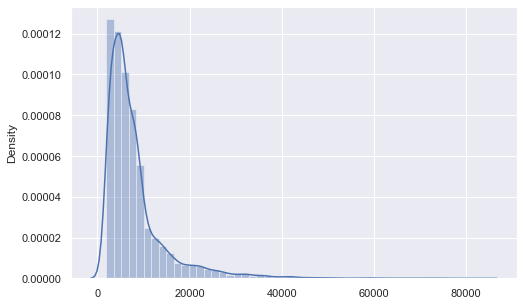

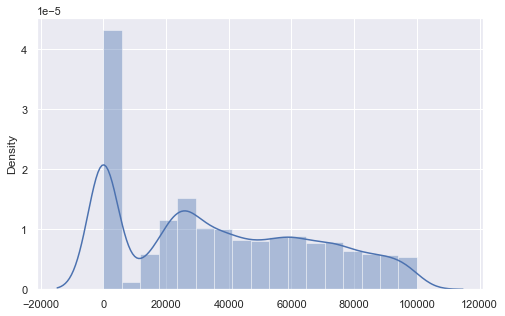

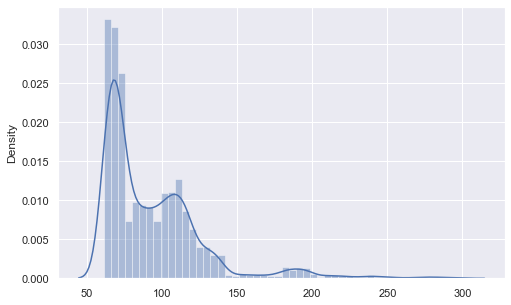

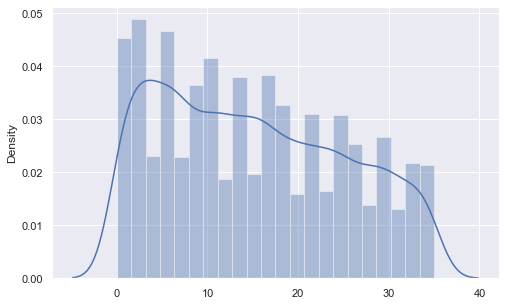

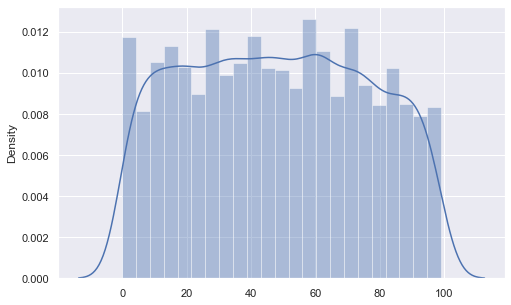

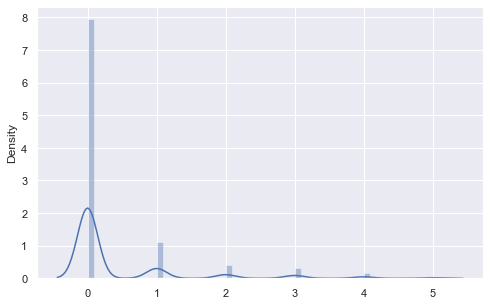

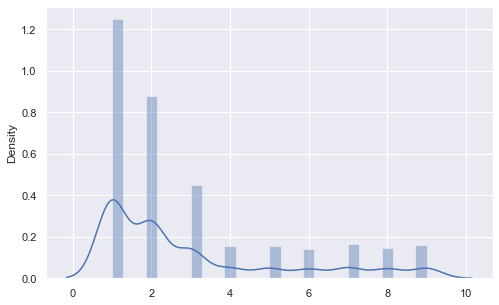

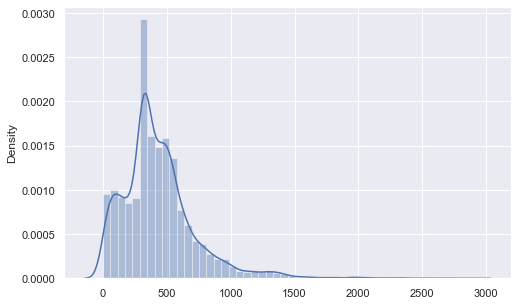

In [396]:
def distribution(df):
    for column in df.columns:
            plt.figure(figsize=(8,5))
            sns.distplot( x=df[column])
distribution(numerical_df)


In [397]:
# removing 'months_since_policy_inception' and 'number_of_open_complaints' the all look skewed to the right

**3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.**

In [398]:
import math
def log_transfom_clean2(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # As only values> 0 are defined in the log function, we are going to return Nan for the rest of the values (-inf,0]
    
# apply the function
for column in numerical_df.columns:
    num_log = list(map(log_transfom_clean2, numerical_df[column]))

C:\Users\Jose María\AppData\Local\Temp\ipykernel_7720\3839222729.py:3: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)


In [399]:
type(num_log) # check the type of num_log

list

In [400]:
num_log=pd.DataFrame(num_log) # now lets turn the list into a data frame

In [401]:
# Now we replace the Nan's by the mean
num_log = num_log.fillna(np.mean(num_log))
num_log

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,0
0,2.585248
1,3.053641
2,2.753179
3,2.724179
4,2.140291
...,...
9129,2.297180
9130,2.578868
9131,2.898058
9132,2.839604


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


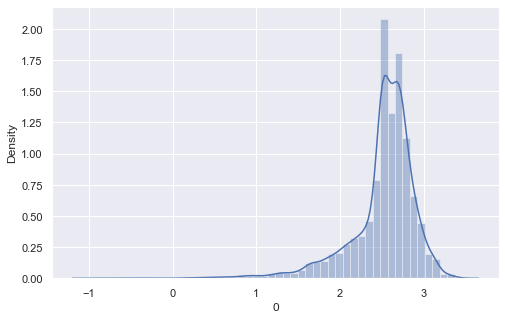

In [402]:
def distribution_log_transformed(df):
    for column in df.columns:
            plt.figure(figsize=(8,5))
            sns.distplot(df[column])
distribution_log_transformed(num_log)